<a href="https://colab.research.google.com/github/Shamima-Ali/ml-project/blob/master/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [97]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [98]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [99]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [100]:
y = y.reshape(len(y), 1)

In [101]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler

# cannot use same sc object for X and y
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [103]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [104]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [105]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [106]:
# Transform the X based on the sc_X created from the X data above
X_desired_scaled = sc_X.transform([[6.5]])

# The regressor will return a y that is transformed based on the sc_y
y_pred_transformed = regressor.predict(X_desired_scaled)

# To get the real value of y, inverse the transform
y_pred_transformed_reversed = sc_y.inverse_transform(y_pred_transformed.reshape(-1,1))
print(y_pred_transformed_reversed)

[[170370.0204065]]


## Visualising the SVR results

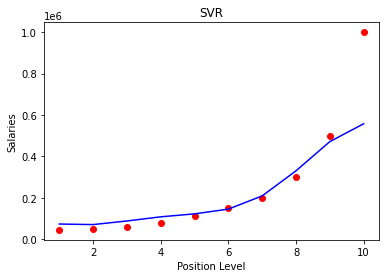

In [107]:
# Reverse transform X nd y
X_transformed_reversed = sc_X.inverse_transform(X)
y_transformed_reversed = sc_y.inverse_transform(y)
plt.scatter(X_transformed_reversed, y_transformed_reversed, color='red')

# Predict values for X, then reverse transform the predicted value
y_pred_for_X_transformed = regressor.predict(X)
y_pred_for_X_transformed_reversed = sc_y.inverse_transform(y_pred_for_X_transformed.reshape(-1,1))
plt.plot(X_transformed_reversed, y_pred_for_X_transformed_reversed, color='blue')

plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

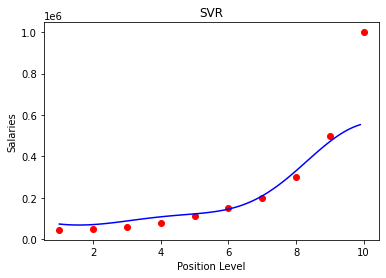

In [109]:
# Reverse transform X nd y
X_transformed_reversed = sc_X.inverse_transform(X)
y_transformed_reversed = sc_y.inverse_transform(y)

# Create the grid with values from X_transformed_reversed
X_grid = np.arange(min(X_transformed_reversed), max(X_transformed_reversed), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_transformed_reversed, y_transformed_reversed, color='red')

# Predict values for X_grid, then reverse transform the predicted value
X_grid_desired_scaled = sc_X.transform(X_grid)
y_pred_for_X_grid_transformed = regressor.predict(X_grid_desired_scaled)
y_pred_for_X_transformed_reversed = sc_y.inverse_transform(y_pred_for_X_grid_transformed.reshape(-1,1))
plt.plot(X_grid, y_pred_for_X_transformed_reversed, color='blue')

plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()